네이버 증권 모바일 사이트에서 주가 크롤링
대장주들과 코스피간의 대략적인 상관관계 파악 

url변경없이 데이터를 수정 및 추가하는 방식이므로 requests:json 방식 사용

In [1]:
import requests

In [2]:
#url
celltrion_url='https://m.stock.naver.com/api/item/getPriceDayList.nhn?code=068270&pageSize=20&page=1'
samsung_url='https://m.stock.naver.com/api/item/getPriceDayList.nhn?code=005930&pageSize=20&page=1'
mobis_url='https://m.stock.naver.com/api/item/getPriceDayList.nhn?code=005380&pageSize=20&page=1'
hynix_url='https://m.stock.naver.com/api/item/getPriceDayList.nhn?code=000660&pageSize=20&page=1'
naver_url='https://m.stock.naver.com/api/item/getPriceDayList.nhn?code=035420&pageSize=20&page=1'
kakao_url='https://m.stock.naver.com/api/item/getPriceDayList.nhn?code=035720&pageSize=20&page=1'

In [3]:
# requests,response : json(Str)
response1=requests.get(celltrion_url)
response2=requests.get(samsung_url)
response3=requests.get(mobis_url)
response4=requests.get(hynix_url)
response5=requests.get(naver_url)
response6=requests.get(kakao_url)

In [4]:
datas1 = response1.json()['result']['list']
datas2 = response2.json()['result']['list']
datas3 = response3.json()['result']['list']
datas4 = response4.json()['result']['list']
datas5 = response5.json()['result']['list']
datas6 = response6.json()['result']['list']

In [5]:
import pandas as pd
celltrion_df=pd.DataFrame(datas1)
samsung_df=pd.DataFrame(datas2)
mobis_df=pd.DataFrame(datas3)
hynix_df=pd.DataFrame(datas4)
naver_df=pd.DataFrame(datas5)
kakao_df=pd.DataFrame(datas6)

In [6]:
#코스피와의  비교

# 1. 웹 페이지 분석 : URL
url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?\
code=KOSPI&pageSize=20&page=1"

In [7]:
response = requests.get(url)
response

<Response [200]>

In [8]:
datas = response.json()["result"]["siseList"]
kospi_df = pd.DataFrame(datas)
kospi_df

,cd,dt,ncv,cv,cr,ov,hv,lv
0,KOSPI,20200624,2166.28,35.04,1.64,2145.93,2171.86,2143.91
1,KOSPI,20200623,2131.24,4.51,0.21,2149.13,2158.15,2110.51
2,KOSPI,20200622,2126.73,-14.59,-0.68,2126.38,2142.88,2122.10
3,KOSPI,20200619,2141.32,7.84,0.37,2153.09,2153.57,2108.91
4,KOSPI,20200618,2133.48,-7.57,-0.35,2134.35,2145.13,2120.29
5,KOSPI,20200617,2141.05,3.00,0.14,2133.18,2154.37,2105.26
6,KOSPI,20200616,2138.05,107.23,5.28,2091.09,2138.08,2079.02
7,KOSPI,20200615,2030.82,-101.48,-4.76,2114.41,2129.67,2030.82
8,KOSPI,20200612,2132.30,-44.48,-2.04,2088.24,2137.12,2084.63
9,KOSPI,20200611,2176.78,-18.91,-0.86,2184.36,2200.72,2148.51


In [9]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

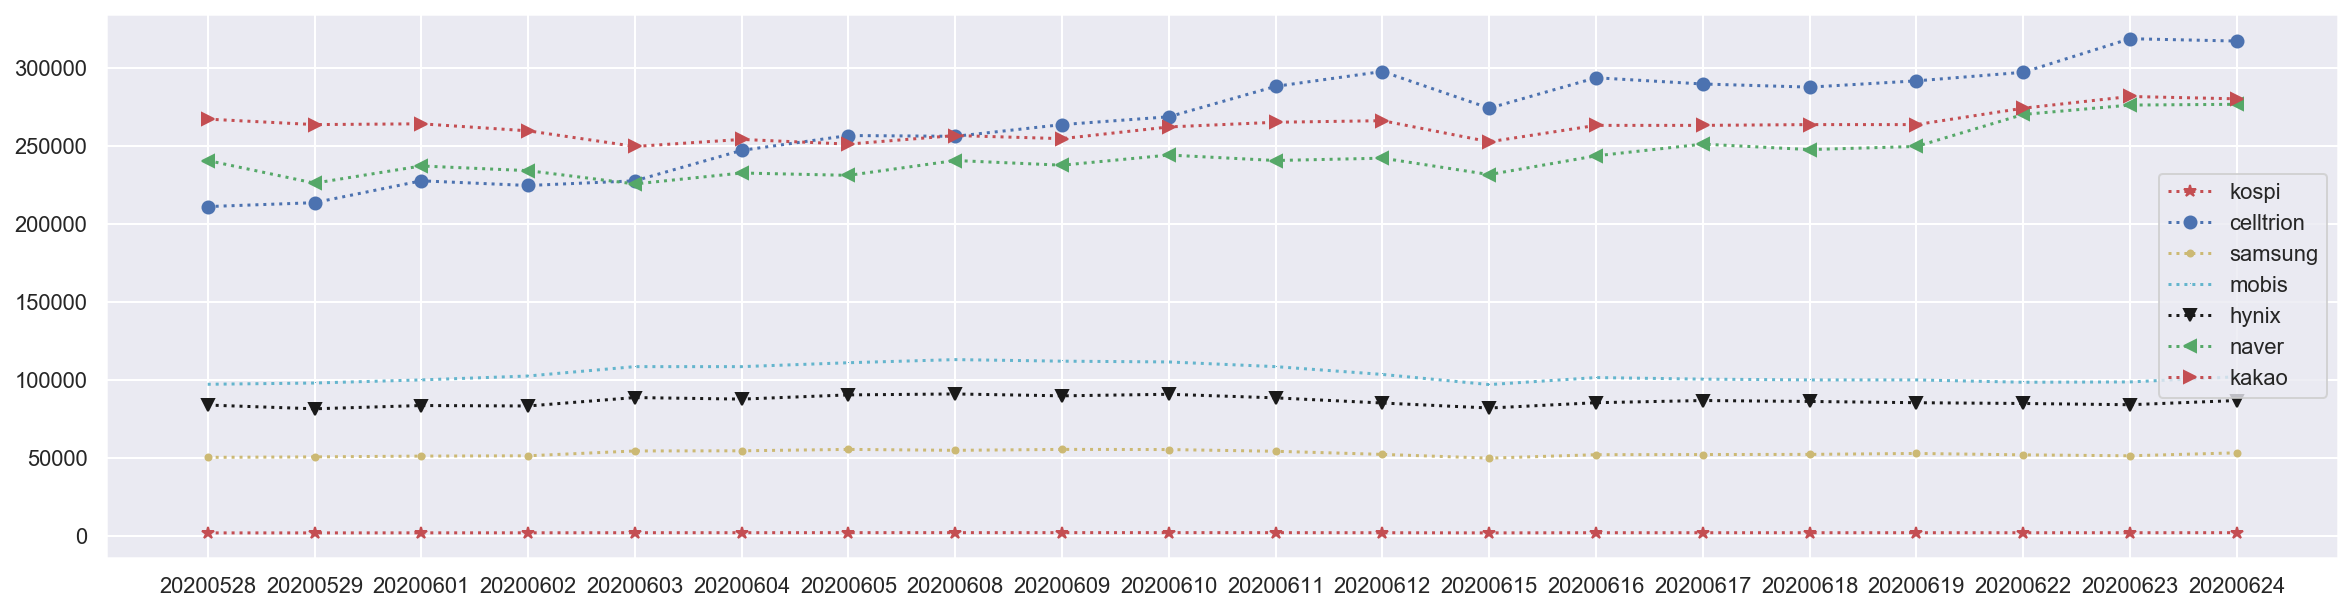

In [15]:
plt.figure(figsize=(20, 5))

plt.plot(kospi_df[::-1]["dt"], kospi_df[::-1]["ncv"], "r*:", label="kospi")

plt.plot(celltrion_df[::-1]["dt"], celltrion_df[::-1]["ncv"], "bo:", label="celltrion")
plt.plot(samsung_df[::-1]["dt"], samsung_df[::-1]["ncv"], "y.:", label="samsung")
plt.plot(mobis_df[::-1]["dt"], mobis_df[::-1]["ncv"], "c,:", label="mobis")
plt.plot(hynix_df[::-1]["dt"], hynix_df[::-1]["ncv"], "kv:", label="hynix")
plt.plot(naver_df[::-1]["dt"], naver_df[::-1]["ncv"], "g<:", label="naver")
plt.plot(kakao_df[::-1]["dt"], kakao_df[::-1]["ncv"], "r>:", label="kakao")


plt.legend(loc=0)

plt.show()

#### 정규화 : Nomalization
- `z = (x - min(x)) / (max(x) - min(x))`

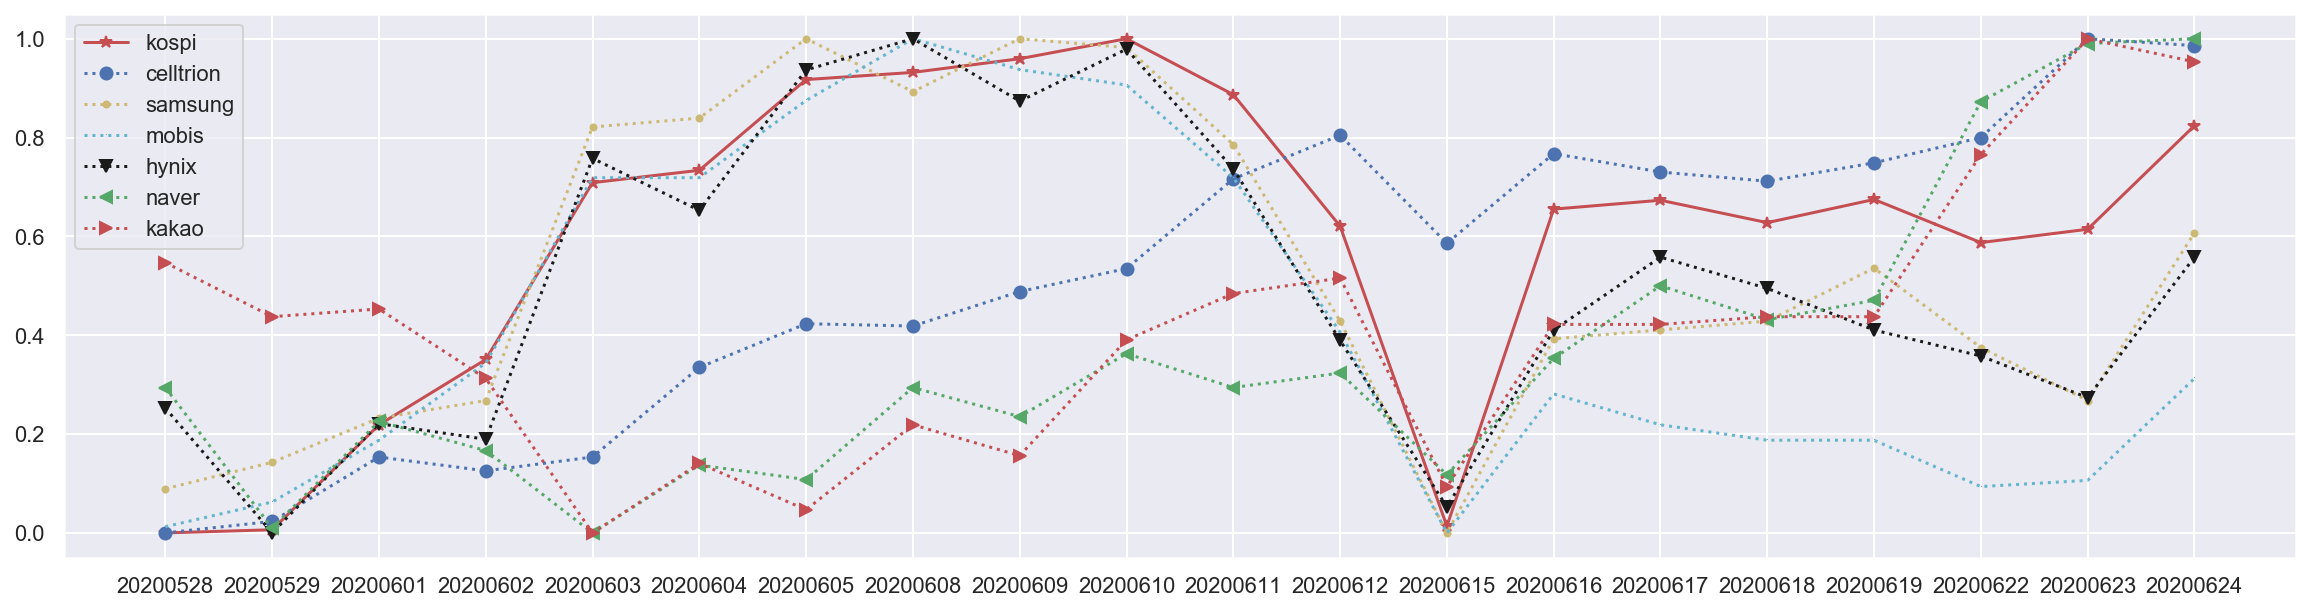

In [17]:
from sklearn import preprocessing

plt.figure(figsize=(20, 5))


plt.plot(kospi_df[::-1]["dt"],  preprocessing.minmax_scale(kospi_df[::-1]["ncv"]), "r*:", label="kospi",ls='-')

plt.plot(celltrion_df[::-1]["dt"],  preprocessing.minmax_scale(celltrion_df[::-1]["ncv"]), "bo:", label="celltrion")
plt.plot(samsung_df[::-1]["dt"],  preprocessing.minmax_scale(samsung_df[::-1]["ncv"]), "y.:", label="samsung")
plt.plot(mobis_df[::-1]["dt"],  preprocessing.minmax_scale(mobis_df[::-1]["ncv"]), "c,:", label="mobis")
plt.plot(hynix_df[::-1]["dt"],  preprocessing.minmax_scale(hynix_df[::-1]["ncv"]), "kv:", label="hynix")
plt.plot(naver_df[::-1]["dt"],  preprocessing.minmax_scale(naver_df[::-1]["ncv"]), "g<:", label="naver")
plt.plot(kakao_df[::-1]["dt"],  preprocessing.minmax_scale(kakao_df[::-1]["ncv"]), "r>:", label="kakao")




plt.legend(loc=0)
plt.show()

In [ ]:
#celltrion은 걍 계속오르네?
#삼성은 코스피지수와 흡사
#모비스는 코스피지수와 흡사한데 오를때 반등을 못했음 최근 요 며칠은
#하이닉스는 코스피지수와 흡사
#네이버와 카카오는 지속적인 우상향

# 셀트리온, 네이버, 카카오는 지속적인 우상향기업 코스피지수와 상관없이...
# 삼성전자, 하이닉스, 모비스는 코스피지수를 흡사하게 따라감...
# 코스피지수를 따라 투자하면 삼전, 지속적인 미래 성장을 본다면, 우상향기업에 투자해야 좋은듯??